In [13]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [14]:
# 生成樣本
# 樣本量少於特徵量,五十樣本 二百特徵


X =np.random.randn(50,200)
X

array([[ 0.50070222, -2.08239323, -0.76622213, ..., -0.05657161,
        -0.17868557, -1.23837253],
       [ 0.26799231, -0.92906316, -0.15798898, ...,  1.0596332 ,
        -3.23336273, -0.46001243],
       [ 0.75061304,  0.09642188,  0.28540169, ...,  0.26304271,
        -0.55423796, -1.48456362],
       ...,
       [ 0.8226829 , -0.48643136,  0.58032908, ...,  1.39917318,
        -0.81823979,  0.95695136],
       [-0.12327745, -0.96569197,  0.67295306, ...,  1.19704192,
        -0.86491794, -0.10409067],
       [ 0.74241173, -1.10323553, -0.12352531, ...,  0.13125598,
         0.77060855,  1.79274196]])

In [15]:
#Xw =y

#有多少屬性，就有多少係數

w = np.random.randn(200)
#隨機選取一百九十個,讓他們為0
w

array([-1.42251666e-01,  7.87835628e-01, -8.77817292e-01, -1.82011964e-01,
        8.27102750e-01, -8.24974588e-01, -3.20688544e-01, -3.15322071e-01,
       -1.14327263e-02,  1.18315464e+00, -1.07617066e+00,  4.87830481e-01,
        1.56543382e-01,  4.06444821e-02, -5.69252999e-01, -2.42468997e-01,
       -1.36762622e-02, -1.01706738e+00,  5.91970139e-01,  3.12972403e-02,
        1.19406697e+00, -6.65718269e-01,  5.68362078e-01,  4.35456367e-01,
        1.42443547e-01,  5.63764406e-01,  1.12477905e+00, -7.84259601e-03,
       -7.95725164e-01, -9.67310536e-01,  3.13393004e-01, -5.18557125e-01,
        2.17604539e-01,  2.70424572e-01, -1.37122539e+00, -2.65827480e-01,
       -7.39388924e-01,  1.52767045e+00,  1.86915935e+00,  7.82026156e-01,
       -1.15180869e+00,  5.17420788e-01, -1.09295386e-01, -1.02536355e+00,
       -8.14437983e-01,  4.13750981e-01, -1.59847103e-02,  8.33873786e-01,
       -2.90001199e-01, -3.12349430e-02, -1.13879845e+00,  6.62358374e-01,
       -5.52799540e-01, -

In [16]:
index = np.arange(200)

np.random.shuffle(index)
index

array([157, 143, 199, 109, 167, 101, 104,  69,  95,  74,  79,  53,   5,
       159, 187, 146,  17,  15,  16,  24, 102,  47, 163,  92,   9,  13,
        30, 189, 149, 168,  57, 126,  83, 153, 125,  34,  91, 160, 177,
        26, 112,  29, 100,  32,  14,  19, 165,  62,  85, 123,  38, 164,
       132,  55,  81,  71, 111, 103, 166, 181,  33,  46,  12, 185,   1,
        99, 162, 139, 151,  72, 121,  40, 180,  43,  37, 156, 190,  87,
        90, 186, 198,  28, 122, 127, 106,  61, 196,  10, 175,  77,  59,
        39, 124,  94,  49,  31, 161, 110,   8,  25, 184, 108,  97,  82,
       155, 169, 136, 137,  45, 141,  51,  67, 135,  63,  58, 183,  84,
        96,  18,  36, 172, 195, 191, 119, 194, 182, 174,  70, 105, 114,
       129, 179,  68,  22,  21, 178,   3,  93,  75,  44,  20, 170,  35,
        56,  65, 107, 173,  54, 158,  86, 128,  66, 176, 116,  42, 113,
       115,  48,  89, 138, 140, 145,  27,  41, 192,  64, 150,  60,   0,
       120, 144,  11,   6, 133, 142, 118,   4, 154,  80,  50,  9

In [17]:
w[index[:190]] =0
w

array([ 0.        ,  0.        , -0.87781729,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.55279954,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [18]:
# y是目标值
y = X.dot(w)
y

array([-0.3508752 ,  6.15545282,  1.48635368, -0.15342934, -9.01618032,
        2.18771298, -2.63782717,  2.53605209,  3.41457402, -0.13984684,
       -1.73035071, -4.77532506, 11.34087818,  3.60820768, -0.24496739,
       -4.65319178,  3.95472725,  0.30248407, -4.82100878,  5.31486277,
        4.88356517,  5.04353062, -1.80882697,  0.83285577,  0.78300219,
        1.65875414,  1.47713405,  0.25107974, -0.42067569, -4.84497587,
       -4.15716299, -2.27261661, -0.77040344, -5.93921502,  3.31307015,
        5.21590329, -4.37703268, -4.81047356,  0.38467764, -0.71293263,
        8.2997065 ,  5.83608747, -9.69436274,  9.66333956, -9.65803695,
        3.0223129 ,  6.93122902,  1.19744705, -1.56461629,  3.19950008])

In [32]:
#定義三個回歸方式
lr = LinearRegression(fit_intercept=False)

ridge = Ridge(alpha = 10000,fit_intercept=False)

lasso = Lasso(alpha=0.2,fit_intercept=False)

lr.fit(X,y)

ridge.fit(X,y)

lasso.fit(X,y)


lr_w = lr.coef_

ridge_w = ridge.coef_

lasso_w = lasso.coef_





Text(0.5, 1.0, 'Lasso')

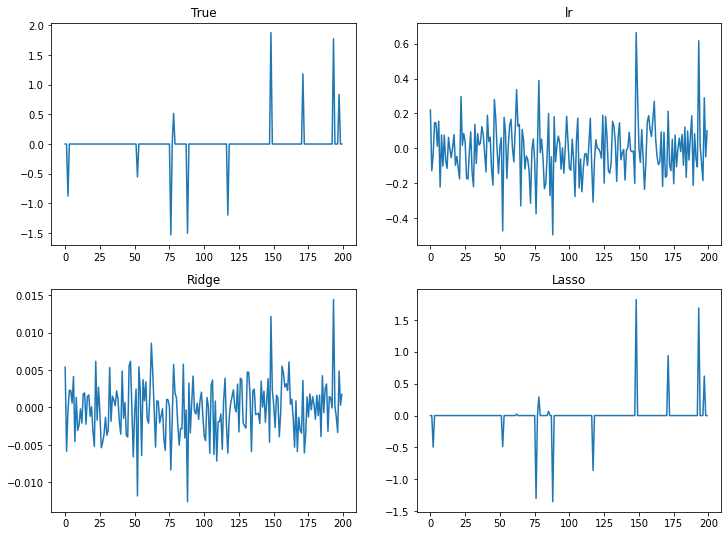

In [33]:

# 四个子视图
plt.figure(figsize=(12,9))

ax = plt.subplot(2,2,1)
ax.plot(w)
ax.set_title('True')


ax = plt.subplot(2,2,2)
ax.plot(lr_w)
ax.set_title('lr')

ax = plt.subplot(2,2,3)
ax.plot(ridge_w)
ax.set_title('Ridge')

ax = plt.subplot(2,2,4)
ax.plot(lasso_w)
ax.set_title('Lasso')

In [36]:
# 如果方程的解是稀鬆矩陣 Lasso 是最好的

#Ridge回歸縮減並沒有將係數變成0

#線性回歸 Ridge回歸 Lasso回歸都是最小二乘法
   
# Ridge回歸:L2正則項  縮減係數 如果線性回歸出現過擬合 使用Ridge回歸進行優化
                     # 即便沒出現過擬合  也會嘗試用Ridge回歸 (加入偏差 得到更好結果)


# Lasso回歸: L1正則項   (當屬性很多的時候，可以採用Lasso回歸)
